# Predicting Bank Telemarketing sucess.
### A approach with XGBoost and Bayesian parameter optimization. 


### Dataset source:

> S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Dataset available [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

### Dataset description: 


#### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone') 
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

####  other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

####  social and economic context attributes
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
df = pd.read_csv('/home/hypathia/Desktop/bank-additional-full.csv', sep=";")
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [83]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

Missing data is refered as 'unknown' in this dataset. I'll imputate this data to get a more robust model. Since Python is far behind R in this mater I'll have to do it under R through rpy2, using the MICE (Multivariate Imputation by Chained Equations) library.

In [6]:
%load_ext rpy2.ipython

In [7]:
%%R
library(mice)

df <- read.csv("/home/hypathia/Desktop/bank-additional-full.csv", sep=";")
df[ df == "unknown" ] = NA
tempDf <- mice(df,meth='pmm',seed=42)
compDf <- complete(tempDf,5)

/usr/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Rcpp

  warnings.warn(x, RRuntimeWarning)
/usr/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: mice 2.25 2015-11-09

  warnings.warn(x, RRuntimeWarning)



 iter imp variable
  1   1  job  marital  education  default  housing  loan
  1   2  job  marital  education  default  housing  loan
  1   3  job  marital  education  default  housing  loan
  1   4  job  marital  education  default  housing  loan
  1   5  job  marital  education  default  housing  loan
  2   1  job  marital  education  default  housing  loan
  2   2  job  marital  education  default  housing  loan
  2   3  job  marital  education  default  housing  loan
  2   4  job  marital  education  default  housing  loan
  2   5  job  marital  education  default  housing  loan
  3   1  job  marital  education  default  housing  loan
  3   2  job  marital  education  default  housing  loan
  3   3  job  marital  education  default  housing  loan
  3   4  job  marital  education  default  housing  loan
  3   5  job  marital  education  default  housing  loan
  4   1  job  marital  education  default  housing  loan
  4   2  job  marital  education  default  housing  loan
  4   3  jo

In [28]:
# Pull the imputed dataframe to python
%Rpull compDf
df = compDf

Encode each nominal label to numerical values.

In [29]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
lbl_enc = lambda x: enc.fit_transform(x)
lbl_denc = lambda x: enc.inverse_transform(x)

for i in range(len(df.dtypes)):
    var = df.dtypes.index[i]
    if df.dtypes[i] == np.dtype('O'):
        print('\n> Encoding {} to numerical'.format(var.upper()))
        df[var] = lbl_enc(df[var])


> Encoding JOB to numerical
housemaid	services	admin.	blue-collar	technician	retired	management	unemployed	self-employed	entrepreneur	student

> Encoding MARITAL to numerical
married	single	divorced

> Encoding EDUCATION to numerical
basic.4y	high.school	basic.6y	basic.9y	professional.course	university.degree	illiterate

> Encoding DEFAULT to numerical
no	yes

> Encoding HOUSING to numerical
no	yes

> Encoding LOAN to numerical
no	yes

> Encoding CONTACT to numerical
telephone	cellular

> Encoding MONTH to numerical
may	jun	jul	aug	oct	nov	dec	mar	apr	sep

> Encoding DAY_OF_WEEK to numerical
mon	tue	wed	thu	fri

> Encoding POUTCOME to numerical
nonexistent	failure	success

> Encoding Y to numerical
no	yes


In [30]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,57,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
features = df.columns.tolist()[0:df.shape[1]-1]
features.remove('duration') # for a realistic predictive model.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], 
                                                    df['y'], 
                                                    test_size=0.33, 
                                                    random_state=42)

In [46]:
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#build a classifier
xgbm1 = xgboost.XGBClassifier(learning_rate = 0.1, 
                             gamma=0,
                             objective='binary:logistic', 
                             nthread=1,
                             seed=42)

#fit the classifier
xgbm1.fit(X_train, y_train)

# Print accuracy 
accuracy = accuracy_score(y_test, xgbm1.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Try 10-fold CV, print accuracy
kfold = KFold(n_splits=10, random_state=42)
accuracy = cross_val_score(xgbm1, X_train, y_train, cv=kfold, n_jobs=10)

print("Accuracy 10-fold CV: %.2f%% (±%.2f%%)" % (accuracy.mean()*100, accuracy.std()*100))
print("Max accuracy 10-fold CV: %.2f%%" % (accuracy.max()*100))
print("Min accuracy 10-fold CV : %.2f%%" % (accuracy.min()*100))

Accuracy: 90.03%
Accuracy 10-fold CV: 90.17% (±0.52%)
Max accuracy 10-fold CV: 91.16%
Min accuracy 10-fold CV : 89.31%


A very good accuracy and even better 10-fold CV accuracy considering a literally out of the box experience (i.e. with no parameter tuning). I'll extract the used parameters and start a Bayesian Optimisation process based on nearby parameters.

In [51]:
xgbm1.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)>

In [ ]:
## Load Bayesian Optimization library
from bayes_opt import BayesianOptimization


## Define xgb classification model with 10-fold cross-validation
def xgb_BayesOpt(
                n_estimators,
                eta,
                max_depth, 
                gamma, 
                min_child_weight, 
                max_delta_step, 
                subsample,
                colsample_bytree
                ):
    params = {
                'gamma': gamma,
                'n_estimators': n_estimators,
                'booster': 'gbtree',
                'max_depth': max_depth.astype(int),
                'eta': eta,
                'objective': 'binary:logistic',
                'nthread' : 6,
                'silent': True,
                'subsample': subsample,
                'colsample_bytree': colsample_bytree,
                'min_child_weight': min_child_weight,
                'max_delta_step': max_delta_step.astype(int),
                'seed': 42
             }
    
    cv_r=xgb.cv(
                params,
                dtrain,
                num_boost_round=10000,
                stratified=True,
                nfold=folds,
                verbose_eval=False,
                metrics=["error"],
                callbacks=[xgb.callback.early_stop(300)]
                )

    return(-cv_r['test-error-mean'].values[-1])

## Place BayesOpt object with dict of arrays w/ possible values for each parameter.
xgb_BO = BayesianOptimization(xgb_BayesOpt, {'max_depth': (3,5),
                                             'n_estimators': (75,200),
                                             'eta': (0.075, 0.125),
                                             'gamma': (0, 0.1),
                                             'min_child_weight': (1, 2),
                                             'max_delta_step': (0, 1),
                                             'subsample': (0.9, 1),
                                             'colsample_bytree': (0.9, 1)})

## Define BayesOpt parameters and dataset.
dtrain = xgb.DMatrix(X_train, y_train)
random_state = 42
num_iter = 5
init_points = 5
folds = 10

## Start parameter tuning -> attempt to search parameters that minimize error mean.
xgb_BO.maximize(init_points=init_points, 
                n_iter=num_iter,
                acq='ucb', kappa=2)

#### Best parameters found: 
 - colsample_bytree: .97
 - eta: 0.123
 - gamma: 0.097
 - max_delta_step: 0  
 - max_depth: 4
 - min_child_weight: 1  
 - n_estimators: 170
 - subsample: 0.99

In [64]:
#build a classifier
xgbm2 = xgboost.XGBClassifier(colsample_bytree = 0.97,
                              learning_rate = 0.123, 
                              gamma = 0.097,
                              max_delta_step = 0,
                              max_depth = 4,
                              min_child_weight = 1,
                              n_estimators = 170,
                              subsample = 0.99,
                              objective='binary:logistic', 
                              nthread=1, seed=42)

#fit the classifier
xgbm2.fit(X_train, y_train)

# Print accuracy 
accuracy = accuracy_score(y_test, xgbm2.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Try a 10-fold CV
kfold = KFold(n_splits=10, random_state=42)
accuracy = cross_val_score(xgbm2, X_train, y_train, cv=kfold, n_jobs=6)

# Print 10-fold CV accuracy
print("Accuracy 10-fold CV: %.2f%% (±%.2f%%)" % (accuracy.mean()*100, accuracy.std()*100))
print("Max accuracy 10-fold CV: %.2f%%" % (accuracy.max()*100))
print("Min accuracy 10-fold CV : %.2f%%" % (accuracy.min()*100))

Accuracy: 90.13%
Accuracy 10-fold CV: 90.23% (±0.51%)
Max accuracy 10-fold CV: 91.16%
Min accuracy 10-fold CV : 89.42%


The Bayesian parameter seach improved the models accuracy by +0.1% against the baseline model and +0.07% in the 10-fold CV accuracy.


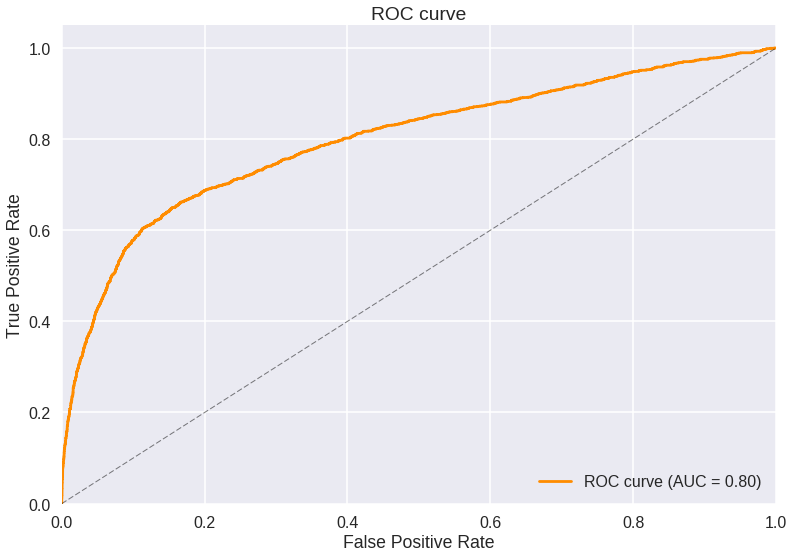

In [82]:
from sklearn import metrics


preds = xgbm2.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = np.trapz(tpr,fpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, 
         color='darkorange', 
         label='ROC curve (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

I'll now plot the variables importance to defining the model.

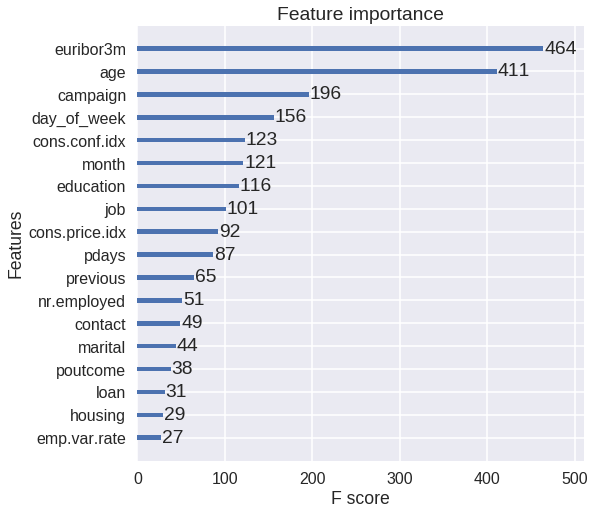

In [125]:
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(xgbm2, ax=ax)

In [8]:
#This chunk is related to Jupyter notebook aesthetics.

import json
from IPython.core.display import HTML
from pylab import rcParams
%matplotlib inline

s = json.load( open("/home/hypathia/bmh_matplotlibrc.json") )  #edit path to json file
rcParams.update(s)
rcParams['figure.figsize'] = 6, 6

def css_styling():
    styles = open("/home/hypathia/custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)

css_styling()